In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import mlxtend

In [3]:
df = pd.read_csv('./placement_data.csv')
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.isna().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [7]:
x = df.iloc[: , 0:2]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [8]:
y = df.iloc[: , 2]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2)

In [10]:
y_test

89    0
82    1
94    0
32    1
98    1
     ..
70    1
36    0
14    0
4     0
30    1
Name: placement, Length: 80, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.29567853, -0.42238   ],
       [-0.62421024, -0.88055491],
       [ 1.01844829,  1.52486338],
       [-0.45994439,  0.2935183 ],
       [-0.54207731, -1.59645321],
       [-0.87060902, -0.99509864],
       [ 0.36138488, -0.25056441],
       [ 1.42911292,  1.03805254],
       [-0.54207731,  1.55349931],
       [-0.78847609,  1.35304779],
       [ 0.19711902, -1.59645321],
       [-1.4455395 , -1.33872982],
       [-0.70634317,  0.95214474],
       [-0.29567853,  0.49396983],
       [ 1.10058121,  0.83760101],
       [ 1.51124585, -0.93782678],
       [-1.4455395 , -0.62283152],
       [ 2.25044218, -0.05011288],
       [ 0.68991658,  0.4653339 ],
       [-0.54207731,  0.17897458]])

In [13]:
x_test = scaler.transform(x_test)
x_test

array([[-0.70634317,  0.83760101],
       [ 0.60778366, -2.42689524],
       [-0.87060902, -1.99735626],
       [ 1.01844829,  0.49396983],
       [ 0.4435178 , -0.53692373],
       [ 0.60778366,  1.0953244 ],
       [ 0.19711902,  0.78032915],
       [-0.29567853, -0.22192847],
       [ 0.77204951,  0.92350881],
       [ 0.93631536,  0.4653339 ],
       [ 1.92191048,  0.78032915],
       [-0.04927976,  1.35304779],
       [-0.95274195,  0.69442135],
       [-0.78847609, -0.27920034],
       [-1.19914072,  2.24076168],
       [ 0.85418243,  0.55124169],
       [-0.45994439, -0.90919084],
       [ 1.26484707, -1.02373457],
       [-0.37781146, -0.22192847],
       [ 1.34697999,  0.2935183 ],
       [ 0.27925195, -1.62508914],
       [-0.45994439,  2.92802405],
       [ 1.01844829, -0.27920034],
       [-0.78847609,  1.1812322 ],
       [ 0.03285317,  1.26713999],
       [-0.29567853,  0.3794261 ],
       [ 0.68991658, -0.05011288],
       [ 1.10058121, -2.11189999],
       [-0.45994439,

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### `Model Training`

In [15]:
model.fit(x_train , y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [17]:
y_test

89    0
82    1
94    0
32    1
98    1
     ..
70    1
36    0
14    0
4     0
30    1
Name: placement, Length: 80, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.925

In [19]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

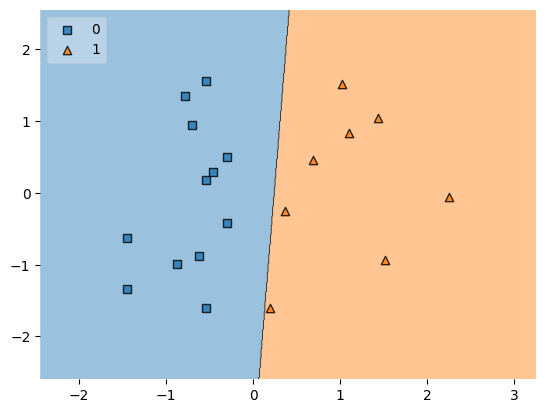

In [20]:
plot_decision_regions(x_train , y_train.values , clf = model , legend=2)

### `Pick the model as a file for deployment`

In [21]:
import pickle

In [22]:
pickle.dump(model , open('model.pkl' , 'wb'))

In [23]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [24]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

c:\Users\Satyam\Desktop\Data_Science\satyam\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 115.92it/s]
